# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

In [50]:
import numpy as np
import pandas as pd
import plotly.express as px

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [51]:
# Открываем данные и 
df = pd.read_csv('spam_or_not_spam.csv', sep=',')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [52]:
# Смотрим соотношение спам- и не спам-писем
df.groupby('label').count()

,email
label,
0,2500
1,499


In [53]:
# Смотрим соотношение в долях
df['label'].value_counts() / df.shape[0] * 100

0    83.333333
1    16.666667
Name: label, dtype: float64

In [54]:
# Визуализируем соотношение 
values_ham_spam= df['label'].value_counts()
fig = px.pie(df, values=values_ham_spam, names=('ham', 'spam'), title='Круговая диаграмма распределения спама и неспама')

fig.show()

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [56]:
df_clean = df.copy()

In [57]:
# Заменяем пустые строки и строки, состоящие из пробелов, на пропуски (NaN)
df_clean.replace(['', ' '], np.nan, inplace=True)
# Удаляем все строки, содержащие пропущенные значения
df_clean.dropna(inplace=True)
# Смотрим результат
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2997 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2997 non-null   object
 1   label   2997 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 70.2+ KB


Переводим данные в векторный вид:

In [58]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_clean["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [59]:
print(f'После обработки стало {X.shape[1]} признаков')

После обработки стало 34116 признаков


## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [60]:
# Определяем целевую переменную
y = df_clean['label']

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [61]:
from sklearn import model_selection
# Разбиваем выборку
X_train, X_test, y_train, y_test =  model_selection.train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [62]:
print("Среднее значение целевой переменной по тестовой выборке:", round(y_test.mean(),3))

Среднее значение целевой переменной по тестовой выборке: 0.165


## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [63]:
# Создаем объект классификатора
clf = MultinomialNB(alpha=0.01)
# Обучаем классификатор на обучающей выборке
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [64]:
print("Accuracy: {:.3f}".format(metrics.accuracy_score(y_test, y_test_pred)))
print('Precision: {:.3f}'.format(metrics.precision_score(y_test, y_test_pred)))
print('Recall: {:.3f}'.format(metrics.recall_score(y_test, y_test_pred)))

Accuracy: 0.987
Precision: 1.000
Recall: 0.919


Нарисуйте ROC-кривую:

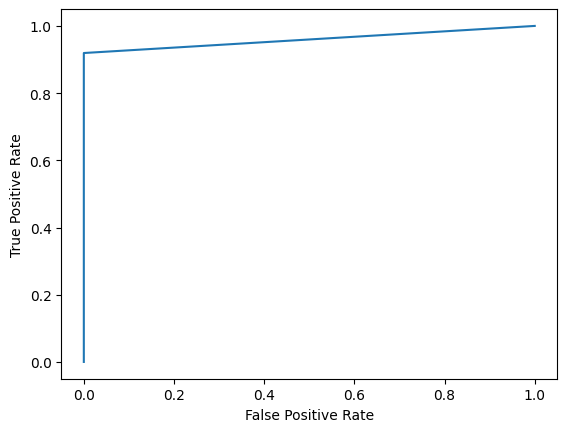

In [65]:
y_pred_proba = clf.predict_proba (X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_test_pred)

#create ROC curve
plt.plot (fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [67]:
# Задаем набор значений параметра alpha с шагом 0.05
param_grid = {'alpha': np.arange(0.01, 10, 0.05)}
# Создаем объект GridSearchCV
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5)
# Обучаем классификатор на обучающей выборке
grid_search.fit(X_train, y_train)
# Выводим наилучшее значение параметра alpha и соответствующее ему качество классификации
best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_
print("Наилучшее значение параметра alpha:", best_alpha)
print("Качество классификации:", best_score)

Наилучшее значение параметра alpha: 0.11
Качество классификации: 0.9915456570155902


Можно сделать вывод, что качество классификации зависит от значения параметра alpha.